# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [20]:
student_data = pd.DataFrame({'Age':[17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]}, index = range(1,11))
student_data

,Age,Tardies
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0
10,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

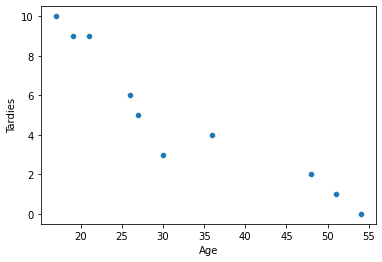

In [21]:
sns.scatterplot(x='Age', y='Tardies', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
'''
Yes, the age increases disproportionally related to Tardies.
'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [28]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [26]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


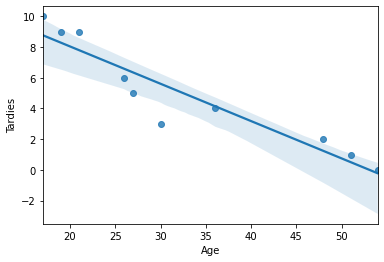

In [31]:
sns.regplot('Age', 'Tardies', data=student_data)
plt.show()

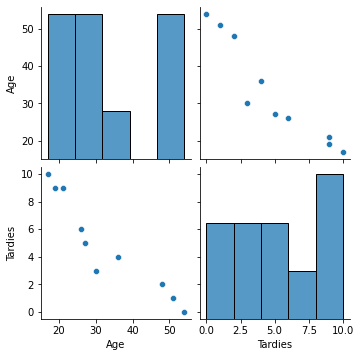

In [32]:
sns.pairplot(student_data)

In [34]:
from sklearn.linear_model import LinearRegression

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [37]:
model = LinearRegression()
X = student_data[['Age']]
y = student_data['Tardies']
model.fit(X,y)

LinearRegression()

In [46]:
X.max()

Age    54
dtype: int64

In [45]:
data_to_predict = pd.DataFrame([20, 23, 55, 11], columns=['Age'])
model.predict(data_to_predict)

array([ 8.03238794,  7.30392563, -0.46633904, 10.21777488])

Plot your regression model on your scatter plot.

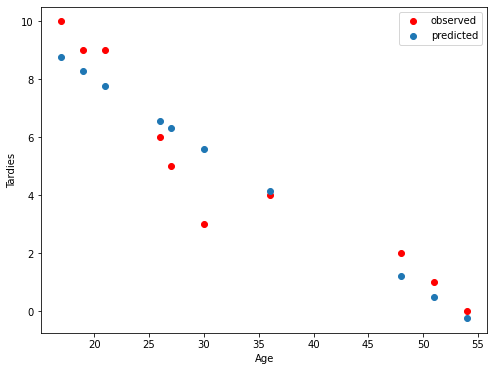

In [47]:
X_all = X
y_predicted_all = model.predict(X_all)
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.scatter(X, y, color='red', label='observed')
plt.scatter(X_all, y_predicted_all, label='predicted')
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [48]:
'''
Yes, the chance of error is low due to the graphic flow.
'''

'\nYes, the chance of error is low due to the graphic flow.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [50]:
vec = pd.read_csv('vehicles.csv')
vec.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

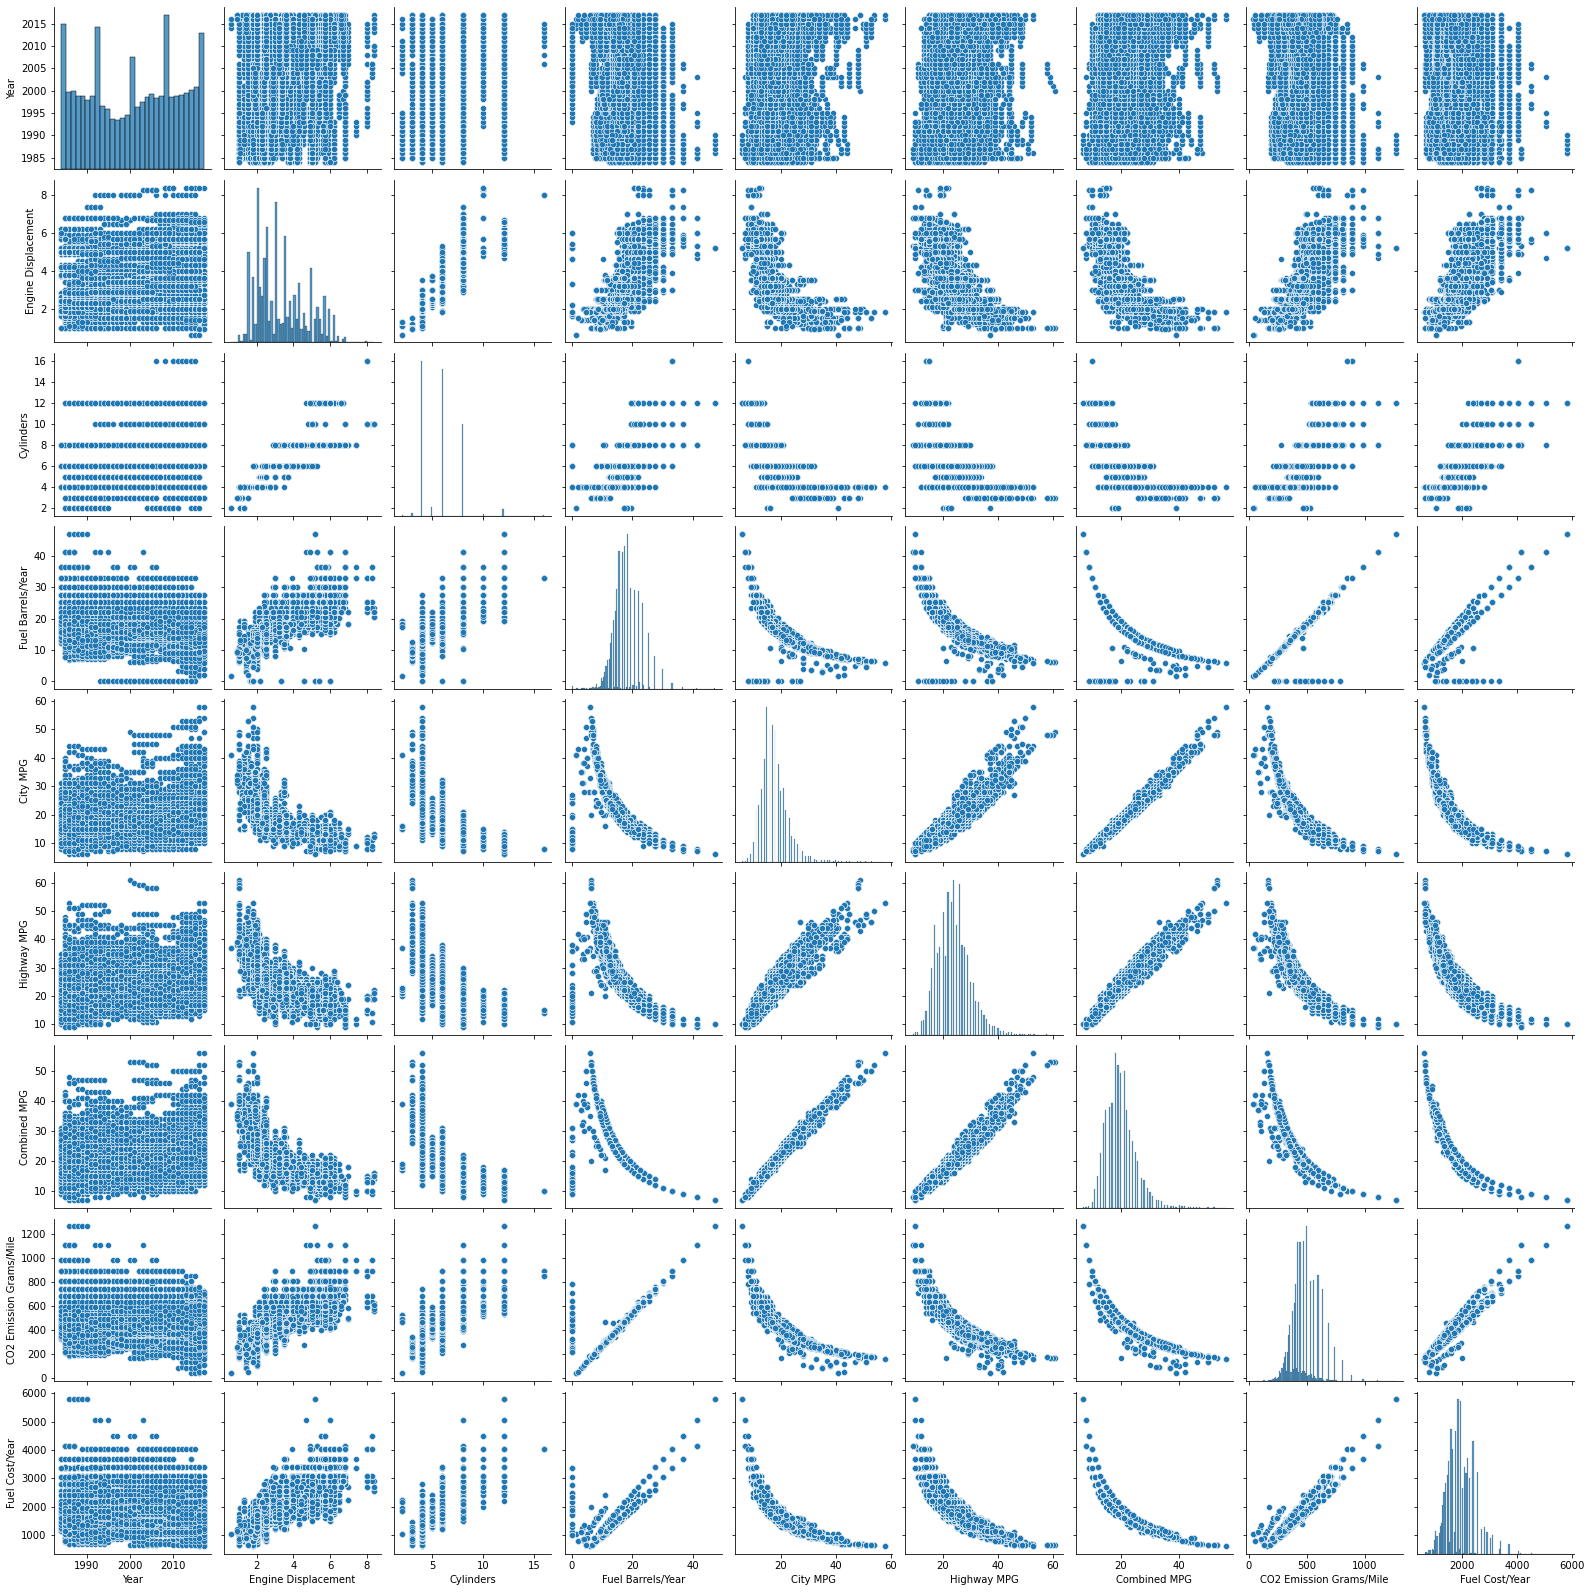

In [51]:
# Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year
sns.pairplot(vec)

In [53]:
vec.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [56]:
model = LinearRegression()
X = vec[['Fuel Barrels/Year']]
y = vec['CO2 Emission Grams/Mile']
model.fit(X,y)

LinearRegression()

In [59]:
data_to_predict = pd.DataFrame([1, 19, 20 , 21, 22, 23, 24, 25], columns=['CO2 Emission Grams/Mile'])
model.predict(data_to_predict)

array([ 38.77014623, 511.87540338, 538.15902878, 564.44265418,
       590.72627958, 617.00990497, 643.29353037, 669.57715577])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

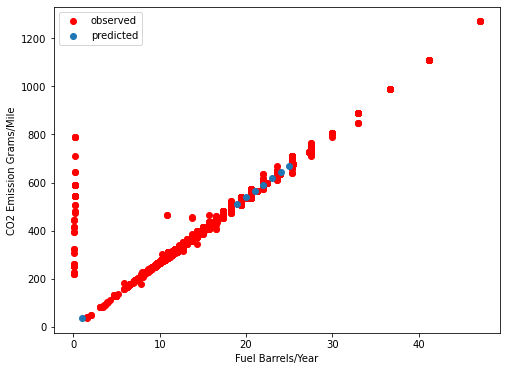

In [63]:
X_all = data_to_predict
y_predicted_all = model.predict(X_all)
plt.figure(figsize=(8,6))
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.scatter(X, y, color='red', label='observed')
plt.scatter(X_all, y_predicted_all, label='predicted')
plt.legend();

In [ ]:
'''
I chose Fuel Barrels/Year because it has a linear regression that seems to have a great influence on CO2 emission because they grow together and have a higher correlation.
'''

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [72]:
df = pd.DataFrame({'Invites':[1, 3, 4, 6, 8, 9, 11, 14], 'Attends': [1, 2, 4, 4, 5, 7, 8, 13]})
df

,Invites,Attends
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='Invites', ylabel='Attends'>

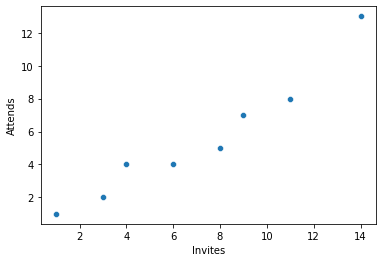

In [73]:
sns.scatterplot(x='Invites', y='Attends', data=df)

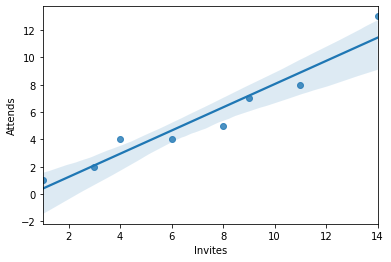

In [75]:
sns.regplot('Invites', 'Attends', data=df)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [78]:
df

,Invites,Attends
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [79]:
model = LinearRegression()
X = df[['Invites']]
y = df['Attends']
model.fit(X,y)
data_to_predict = pd.DataFrame([5, 7, 2, 10], columns=['Attends'])
model.predict(data_to_predict)

array([3.8030303 , 5.5       , 1.25757576, 8.04545455])

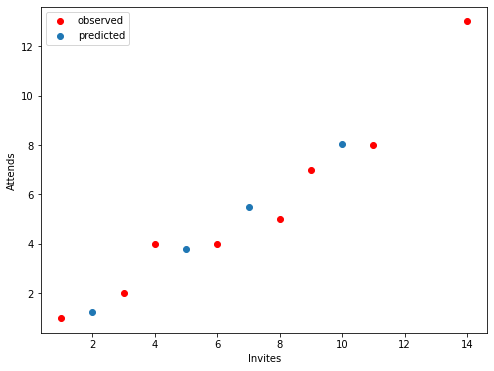

In [80]:
X_all = data_to_predict
y_predicted_all = model.predict(X_all)
plt.figure(figsize=(8,6))
plt.xlabel('Invites')
plt.ylabel('Attends')
plt.scatter(X, y, color='red', label='observed')
plt.scatter(X_all, y_predicted_all, label='predicted')
plt.legend();

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [86]:
df1 = pd.DataFrame({'Invites':[1, 3, 4, 6, 8, 9, 11], 'Attends': [1, 2, 4, 4, 5, 7, 8]})
df1

,Invites,Attends
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


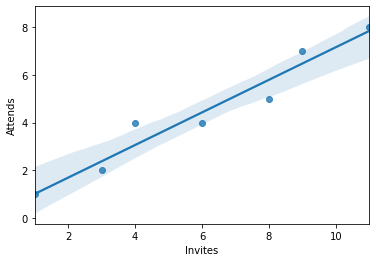

In [87]:
sns.regplot('Invites', 'Attends', data=df1)
plt.show()

In [92]:
model1 = LinearRegression()
X1 = df1[['Invites']]
y1 = df1['Attends']
model1.fit(X1,y1)
data_to_predict1 = pd.DataFrame([5, 7, 2, 10], columns=['Attends'])
model1.predict(data_to_predict1)

array([3.7443609 , 5.11278195, 1.69172932, 7.16541353])

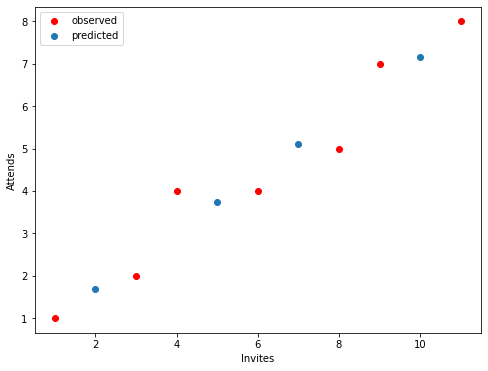

In [94]:
X_all1 = data_to_predict1
y_predicted_all1 = model1.predict(X_all)
plt.figure(figsize=(8,6))
plt.xlabel('Invites')
plt.ylabel('Attends')
plt.scatter(X1, y1, color='red', label='observed')
plt.scatter(X_all1, y_predicted_all1, label='predicted')
plt.legend();
# More consistent linear regression